In [1]:
import pickle
years=['2014','2015','2016','2017']
f='89H'
f2='89V'
# f2='36'
loc = '/Users/mdattler/Desktop/Large_Data_Files/All_AMSR_Data/AMSR_DATA_PICKLE/'

tb89H = pickle.load(open(loc+'2017'+'_amsr_data'+f+'.p', "rb" ))
tb89V = pickle.load(open(loc+'2017'+'_amsr_data'+f2+'.p', "rb" ))




In [177]:
from netCDF4 import Dataset

water=Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/water.nc')
water_bounds = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/water_bounds.nc')


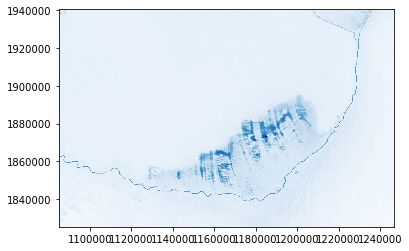

In [8]:
coordinates=pickle.load(open(loc+'geolocations.p', "rb" ))

In [10]:
from pyproj import Proj, transform
coordinates['X12']
inProj = Proj(init='epsg:4326') 
outProj = Proj(init='epsg:3412')
lat = -75.1152
lon = 123.0792

# AMERY ICE SHELF MELT
lat=-71.6960
lon=69.1233

lat1=-71.6938
lon1=69.3840

# Random ice shelf (?)

lat = -69.8287
lon = 32.2482

# x_amsr,y_amsr = transform(inProj,outProj,-170,-81)
x_amsrgood,y_amsrgood = transform(inProj,outProj,lon,lat)
x_amsr1,y_amsr1 = transform(inProj,outProj,lon1,lat1)

# x_amsr,y_amsr = transform(inProj,outProj,-62.088501062835505,-66.15655402424466)
#getting nearby index
yind=np.argmin(np.abs(coordinates['X6'][0,:]-x_amsrgood))
xind=np.argmin(np.abs(coordinates['Y6'][:,0]-y_amsrgood))


yind1=np.argmin(np.abs(coordinates['X6'][0,:]-x_amsr1))
xind1=np.argmin(np.abs(coordinates['Y6'][:,0]-y_amsr1))


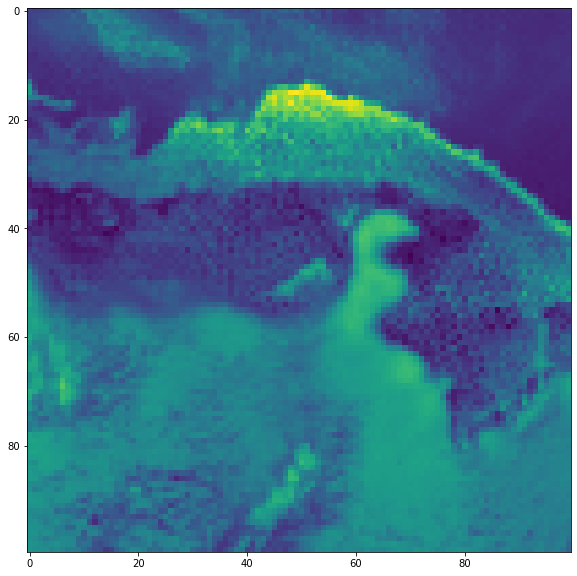

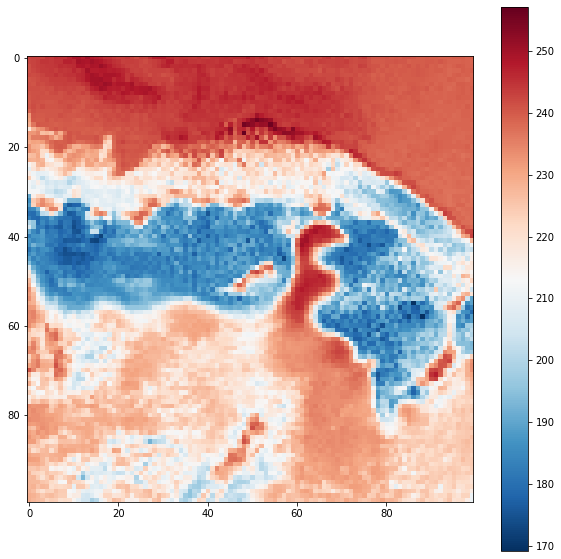

In [361]:
plt.figure(figsize=(10,10))
plt.imshow(tb89H['TB_89H'][xind-50:xind+50,yind-50:yind+50,21])

plt.figure(figsize=(10,10))
plt.imshow(tb89V['TB_89V'][xind-50:xind+50,yind-50:yind+50,21],cmap='RdBu_r')
plt.colorbar()


In [252]:
firndata['x'][0]

masked_array(data=-2425000.,
             mask=False,
       fill_value=1e+20)

In [254]:
x_amsr[0]

-4975102.708712774

In [5]:
import scipy.io as sio
from netCDF4 import Dataset
import pickle
from scipy.interpolate import RegularGridInterpolator
import numpy as np
from pyproj import Proj, transform

firndata = Dataset('/Users/mdattler/Desktop/Large_Data_Files/FirnData/GSFC_FDM_rho_temp_2017.nc')


from mpl_toolkits.basemap import Basemap

local_tbh = np.zeros((365,len(firndata['x'])))*np.nan
# local_tbv = np.zeros((365,len(firndata['x'])))*np.nan

x='X6'
y='Y6'

    
w = 3950*1000*2
h = 3950*1000*2
inProj = Proj(init='epsg:4326') 

m = Basemap(width=w,height=h,projection='stere',\
            lat_ts=-71,lat_0=-90,lon_0=-0.0015,rsphere=6378388,)


lons,lats = m(np.asarray(firndata['x'])+w/2,np.asarray(firndata['y'])+w/2,inverse=True)
blah=Proj(proj='stere', a=6378388,es=0.0819919, lat_0=-90., lat_ts=-71, lon_0=-0.0015, x_0=0, y_0=0)

lons,lats = transform(blah,inProj,np.asarray(firndata['x']),np.asarray(firndata['y']))


outProj = Proj(init='epsg:3412')
x_amsr,y_amsr = transform(inProj,outProj,latandlon['lon'],latandlon['lat'])

# x_amsr,y_amsr = transform(Proj(init='epsg:3412'),Proj(init='epsg:6933'),np.asarray(firndata['x']),np.asarray(firndata['y']))

# for date in np.arange(0,365):
#     itph = RegularGridInterpolator((np.asarray(coordinates[x])[0,:], np.asarray(coordinates[y])[::-1,0]), np.asarray(tb89H['TB_89H'])[::-1,:,date].T, method='linear') 
#     resh = itph((x_amsr,y_amsr))
#     local_tbh[date,:] = resh 

(1800000, 2000000)

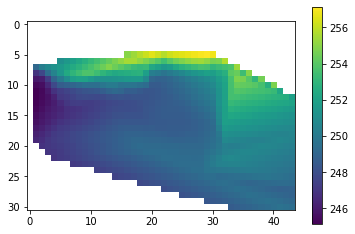

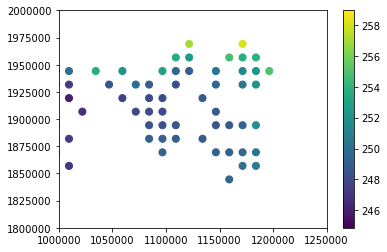

In [367]:
plt.imshow(grid_z0)
plt.colorbar()
plt.figure()
plt.scatter(x_amsr[good][z_old>0],y_amsr[good][z_old>0],s=50,c=z_old[z_old>0])
plt.colorbar()
plt.xlim([1000000,1250000])
plt.ylim([1800000,2000000])

In [376]:
x_amsr

array([[-2417794.71789437],
       [-2405331.8586059 ],
       [-2392868.99885953],
       ...,
       [ 2716903.34126355],
       [ 2729366.20197023],
       [ 2729366.20184682]])

In [401]:
np.where(good==True)

(array([4631, 4632, 4633, 4634, 4635, 4636, 4638, 4639, 4640, 4641, 4642,
        4643, 4644, 4645, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655,
        4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4666, 4667, 4668,
        4673, 4674, 4675, 4680, 4681, 4682, 4687, 4688, 4689, 4694, 4695,
        4696, 4697, 4698, 4699, 4701, 4702, 4703, 4704, 4705, 4706, 4707,
        4711, 4712, 4713, 4714, 4715, 4716, 4717, 4720, 4721, 4722, 4723,
        4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734,
        4735, 4736, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745,
        4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4754, 4755, 4756,
        4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4767, 4768,
        4769, 4770]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0,

# Interpolating CFM Data down

In [407]:
24./5.

4.8

In [406]:
firndata['temperature'][:,:,4633].shape

(73, 351)

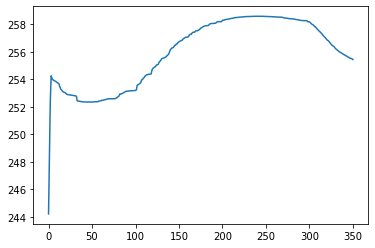

In [405]:
plt.plot(firndata['temperature'][24,:,4633])

In [16]:
firndata['temperature'].shape

(73, 351, 5414)

In [36]:
from scipy.interpolate import griddata

xmin=21
xmax=10

ymin=31
ymax=13

new_x = coordinates['X6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]
new_y = coordinates['Y6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax]


new_z = tb89H['TB_89H'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,21]
z=firndata['temperature'][:,::7,:].shape[1]
depths = np.arange(0,z)

x = 4

good = ((x_amsr>950000) & (x_amsr<1250000) & \
        (y_amsr>1800000) & (y_amsr<2000000))

good = np.squeeze(good)

temp_interp = np.zeros((new_x.shape[0],new_x.shape[1],z))*np.nan
dens_interp = np.zeros((new_x.shape[0],new_x.shape[1],z))*np.nan


for depth in depths:

    x_old = np.squeeze(x_amsr[good])
    y_old = np.squeeze(y_amsr[good])
    temp_old = np.squeeze(np.asarray(firndata['temperature'])[x,depth*7,np.squeeze(good)])
    dens_old = np.squeeze(np.asarray(firndata['density'])[x,depth*7,np.squeeze(good)])
    
    temp_interp[:,:,depth] = griddata((x_old[temp_old>0],y_old[temp_old>0]), temp_old[temp_old>0], (new_x, new_y), method='nearest')
    dens_interp[:,:,depth] = griddata((x_old[dens_old>0],y_old[dens_old>0]), dens_old[dens_old>0], (new_x, new_y), method='nearest')
    


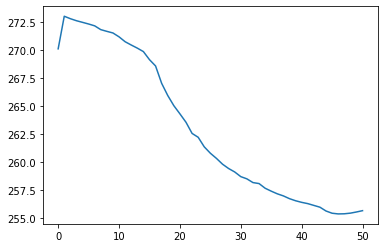

In [20]:
import matplotlib.pyplot as plt
plt.plot(temp_interp[15,10,:])

(1815000, 1950000)

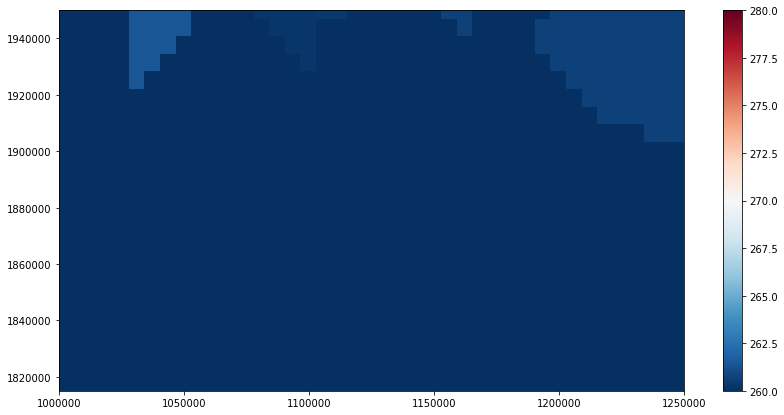

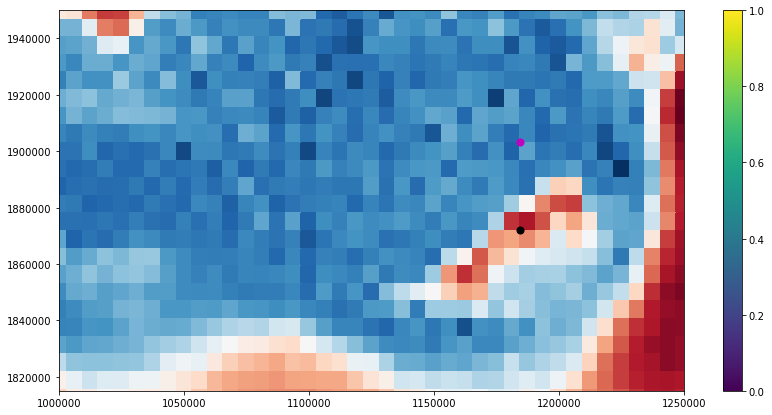

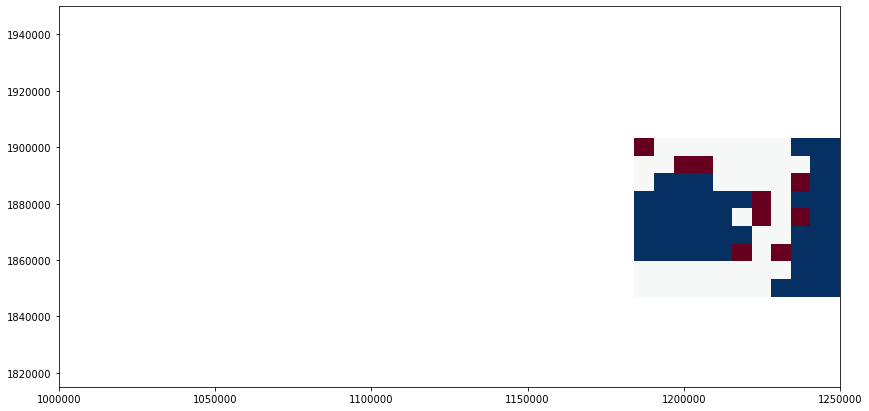

In [66]:
plt.figure(figsize=(14,7))
# plt.scatter(x_amsr,y_amsr,c=np.arange(0,len(x_amsr)))
# plt.colorbar()
# plt.figure()
good = ((x_amsr>950000) & (x_amsr<1250000) & \
        (y_amsr>1800000) & (y_amsr<2000000))


x_old = x_amsr[good]
y_old = y_amsr[good]
z_old = np.asarray(firndata['temperature'])[24,0,np.squeeze(good)]

from scipy import interpolate


grid_z0 = griddata((x_old[z_old>0],y_old[z_old>0]), z_old[z_old>0], (new_x, new_y), method='nearest')
plt.xlim([1000000,1250000])
plt.ylim([1815000,1950000])

plt.pcolor(new_x,new_y,temp_interp[:,:,50],vmax=280,vmin=260,cmap='RdBu_r')
plt.colorbar()
# plt.scatter(x_amsr[good][z_old>0],y_amsr[good][z_old>0],s=50,c='k',vmax=260,vmin=245,cmap='RdBu_r')


plt.figure(figsize=(14,7))
redo1=np.arange(xind-50,xind+50)
redo2=np.arange(yind-50,yind+50)





plt.pcolor(coordinates['X6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax],coordinates['Y6'][xind-xmin:xind+xmax,yind-ymin:yind+ymax],tb89V['TB_89V'][xind-xmin:xind+xmax,yind-ymin:yind+ymax,21],cmap='RdBu_r')
# plt.scatter(x_amsr[good],y_amsr[good],c='k',s=50)
plt.scatter(new_x[20,32],new_y[20,32],c='k',s=50)
plt.scatter(new_x[15,32],new_y[15,20],c='m',s=50)


plt.colorbar()


plt.xlim([1000000,1250000])
plt.ylim([1815000,1950000])
            #local_tbh[24,:]
    
    
plt.figure(figsize=(14,7))

plt.pcolor(new_x,new_y,best_depth,cmap='RdBu')

plt.xlim([1000000,1250000])
plt.ylim([1815000,1950000])

In [ ]:
from smrt import make_snowpack, make_model, sensor_list, water_parameters, make_ice_column


def grab_thicknesses(xvalue):
    in_between = (xvalue[1:] + xvalue[:-1]) / 2
    seperators = np.append(arr = np.array([0.]), values = np.squeeze(in_between), axis= 0)
    full_seperators = np.append(arr = seperators, values = seperators[-5]+100.)
    thicknesses = np.diff(full_seperators)
    return thicknesses

vertical_skip = 7
thicknesses=grab_thicknesses(firndata['depth'][::vertical_skip])

water_depths = np.arange(0.0,0.3,0.01)

best_depth = np.zeros((dens_interp.shape[0],dens_interp.shape[1]))*np.nan


for x in np.arange(0,dens_interp.shape[0]):
    for y in np.arange(0,dens_interp.shape[1]):
        difference = water_depths * np.nan
        for ind,water_depth in enumerate(water_depths):
            
            density = dens_interp[x,y,:]
            temp = temp_interp[x,y,:]
            
            snowpack = make_snowpack(thicknesses, density = density, temperature = temp,
                                                 microstructure_model = 'exponential', corr_length = 0.004)
            if water_depth == 0.:
                medium = snowpack
            else:
                water_layer = make_ice_column(ice_type='firstyear',salinity=0.,temperature=273.15,microstructure_model='exponential',thickness=[water_depth],porosity=100,corr_length=0.005,add_water_substrate=False) 
                medium = water_layer + snowpack
    
            m = make_model("iba", "dort")
        
            sensorH = sensor_list.amsre('89H')
            resH = m.run(sensorH, medium)
            difference[ind] = resH.TbH()-new_z[x,y]
#             if (water_depth == 0.) & (difference[ind] > 0.):
#                 break
            
        print(difference)
        difference_idx = np.nanargmin(np.abs(difference))
        best_depth[x,y] = water_depths[difference_idx]
        print(best_depth[x,y])

import pickle

pickle.dump({'best_depth':best_depth},open('blah.p','wb'))



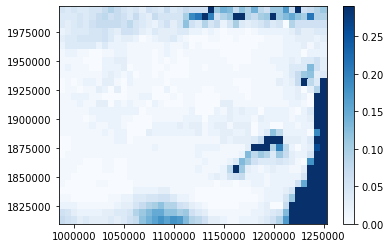

In [73]:
plt.pcolor(new_x,new_y,best_depth,cmap='Blues')
plt.colorbar()

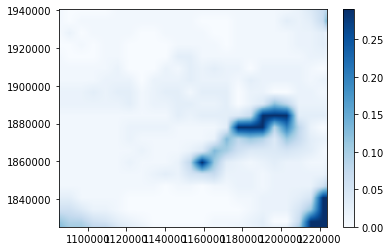

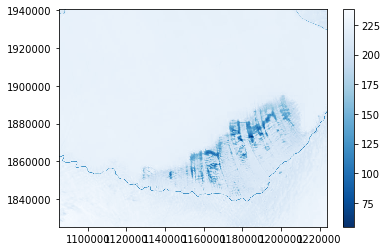

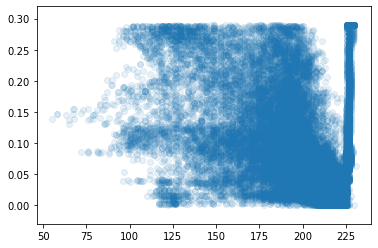

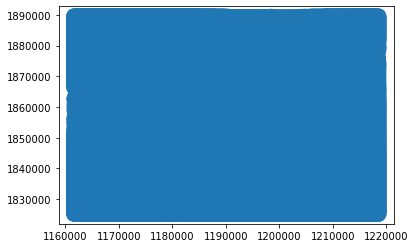

In [157]:
x_water,y_water = np.meshgrid(np.asarray(water['x']),np.asarray(water['y']))

good = ((x_water>950000) & (x_water<1250000) & \
        (y_water>1800000) & (y_water<2000000))

blues = np.asarray(water['Band1'])

from scipy.interpolate import RegularGridInterpolator

f = RegularGridInterpolator((new_y[::-1,0],new_x[0,:],),best_depth[::-1,:])

blues_new = f((y_water,x_water))


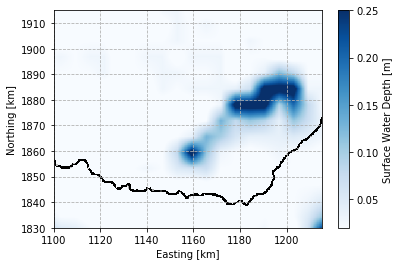

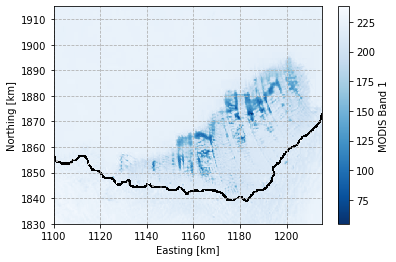

In [196]:
xmin = 1100000/1000
xmax = 1215000/1000
ymin = 1830000/1000
ymax = 1915000/1000


blah=plt.pcolor(x_water[:-100,:-120]/1000,y_water[:-100,:-120]/1000,blues_new[:-100,:-120],cmap='Blues',vmax=0.25,vmin=0.02)
plt.pcolor(np.asarray(water_bounds['x'])/1000,np.asarray(water_bounds['y'])/1000,water_bounds['Band1'],cmap='gray_r',vmax=20)

plt.colorbar(blah).set_label('Surface Water Depth [m]')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.ylabel('Northing [km]')
plt.xlabel('Easting [km]')

plt.grid(linestyle='--')
plt.savefig('Detected_Depth.png',dpi=200)

plt.figure()

blah=plt.pcolor(x_water[:-100,:-120]/1000,y_water[:-100,:-120]/1000,blues[:-100,:-120],cmap='Blues_r')

plt.colorbar(blah).set_label('MODIS Band 1')
plt.pcolor(np.asarray(water_bounds['x'])/1000,np.asarray(water_bounds['y'])/1000,water_bounds['Band1'],cmap='gray_r',vmax=20)

plt.ylabel('Northing [km]')
plt.xlabel('Easting [km]')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.grid(linestyle='--')
plt.savefig('MODIS.png',dpi=200)


# plt.scatter(blues[:-200,300:-110],blues_new[:-200,300:-110],alpha=0.1)

# plt.figure()
# plt.pcolor(x_water[:-200,300:-110],y_water[:-200,300:-110],blues[:-200,300:-110])
